<a href="https://colab.research.google.com/github/MargilModi/CN6005/blob/main/week3_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ======================================
# 1️⃣ Import required libraries
# ======================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ======================================
# 2️⃣ Load dataset
# ======================================
# If you already have df in memory, skip this line:
df = pd.read_csv("titanic.csv")

print(type(df))

print(df.head())

# ======================================
# 3️⃣ Data cleaning
# ======================================

# --- Drop irrelevant text columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

# --- Fix the 'Sex' column robustly
df['Sex'] = df['Sex'].astype(str).str.strip().str.lower()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

# --- Fill missing Age and Fare values with median
for col in ['Age', 'Fare']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# --- Handle 'Embarked' if it exists
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# ======================================
# 4️⃣ Confirm no missing values
# ======================================
print("\n🧹 Missing values after cleaning:")
print(df.isnull().sum())

# ======================================
# 5️⃣ Define features (X) and label (y)
# ======================================
X = df.drop('Survived', axis=1)
y = df['Survived']

# ======================================
# 6️⃣ Split dataset
# ======================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Train size:", X_train.shape, " Test size:", X_test.shape)

# ======================================
# 7️⃣ Feature scaling
# ======================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================
# 8️⃣ Train models
# ======================================

# --- KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# --- Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# ======================================
# 9️⃣ Evaluate and compare
# ======================================
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_log = accuracy_score(y_test, y_pred_log)

print("\n🔹 KNN Accuracy:", round(acc_knn, 4))
print("🔹 Logistic Regression Accuracy:", round(acc_log, 4))

print("\n📊 Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

print("\n📊 Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))


<class 'pandas.core.frame.DataFrame'>
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age            Ticket     Fare  Survived  
0    male  22.0         A/5 21171   7.2500         0  
1  female  38.0          PC 17599  71.2833         1  
2  female  26.0  STON/O2. 3101282   7.9250         1  
3  female  35.0            113803  53.1000         1  
4    male  35.0            373450   8.0500         0  

🧹 Missing values after cleaning:
Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

✅ Train size: (712, 4)  Test size: (179, 4)

🔹 KNN 

/tmp/ipython-input-3572040925.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)


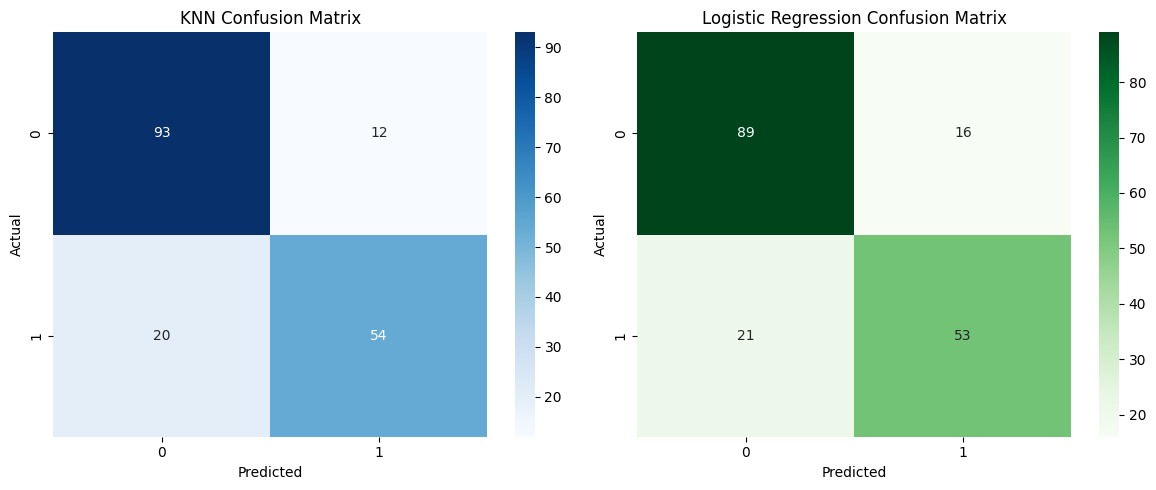

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_log = confusion_matrix(y_test, y_pred_log)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
